**Unidad II: Lectura y visualización de datos regulares**

* En esta capsula revisaremos la forma de importar y visualizar un dataset básico: "dataset_regular.csv"
* Enlace de descarga dataset: https://nubeminera.cl/wp-content/uploads/2019/08/dataset_regular.csv 

Los requerimientos son:

1. https://pypi.org/project/geostatspy/ #Biblioteca GeostatsPy con algoritmos de geoestadística
2. http://www.statios.com/GSLIB/index.html #Ejecutables F90 (32 o 64 bits)

In [17]:
import pandas as pd

df = pd.read_csv("C:/Users/Heber/Desktop/CRMVK NUBE MINERA 2019/dataset/dataset_regular.csv", sep=";")
df.rename(columns={"Unnamed: 0":"ID"}, inplace=True)
df.drop(columns={"ID"}, inplace=True)
df.head()

,X,Y,VA
0,50.0,950.0,9.397573
1,50.0,900.0,7.883499
2,50.0,850.0,8.312884
3,50.0,800.0,6.669975
4,50.0,750.0,6.551156


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,361.0,500.000000,274.241378,50.000000,250.000000,500.000000,750.000000,950.000000
Y,361.0,500.000000,274.241378,50.000000,250.000000,500.000000,750.000000,950.000000
VA,361.0,7.985057,2.042880,1.918069,6.795372,8.092495,9.359666,12.582699


In [20]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
import os
import matplotlib.pyplot as plt

In [21]:
os.chdir("C:/Users/Heber/Desktop/CRMVK NUBE MINERA 2019/GSLIB_FOLDER")

In [22]:
xmin= 0; xmax=1000; ymin=0; ymax=1000
cmap= plt.cm.jet

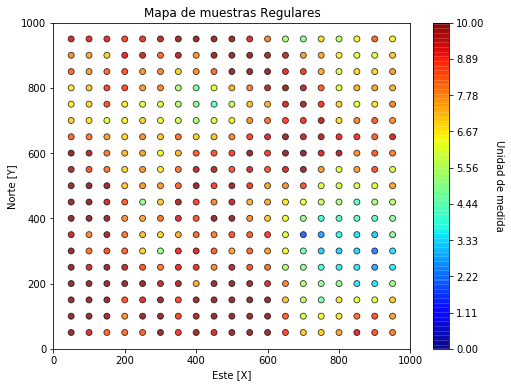

In [29]:
GSLIB.locmap(df, "X", "Y", "VA", xmin, xmax, ymin, ymax, 0,10, "Mapa de muestras Regulares", "Este [X]", "Norte [Y]", "Unidad de medida", cmap, "fig_title")
plt.show()

**Unidad II: Análisis estructural**

* Utilizaremos inicialmente el semivariograma experimental. 
* Luego ajustaremos los datos experimentales a un modelo teorico. 

In [54]:
import numpy as np
hx = 50; hy = 50 ; hd = np.sqrt((hx**2)+(hy**2))

In [60]:
lag000, vario000, np000 = GSLIB.gamv_2d(df, "X", "Y", "VA", 20, hx, 0, 1, 0)
lag090, vario090, np090 = GSLIB.gamv_2d(df, "X", "Y", "VA", 20, hy, 90, 1, 0) 
lag045, vario045, np045 = GSLIB.gamv_2d(df, "X", "Y", "VA", 20, hd, 45, 1, 0) 
lag135, vario135, np135 = GSLIB.gamv_2d(df, "X", "Y", "VA", 20, hd, 135, 1, 0) 

In [62]:
df["VA"].var()

4.1733589689145205

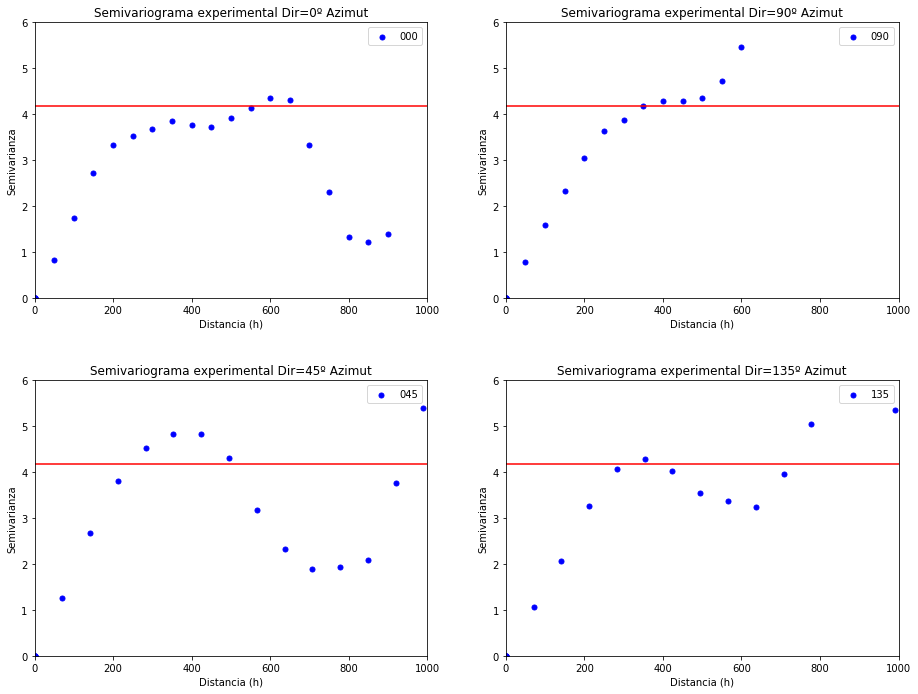

In [73]:
plt.subplot(221)
plt.scatter(lag000, vario000, s=25, marker="o", color="blue", label="000")
plt.plot([0,1000], [4.17,4.17], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=0º Azimut")
plt.ylim(0,6)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(222)
plt.scatter(lag090, vario090, s=25, marker="o", color="blue", label="090")
plt.plot([0,1000], [4.17,4.17], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=90º Azimut")
plt.ylim(0,6)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(223)
plt.scatter(lag045, vario045, s=25, marker="o", color="blue", label="045")
plt.plot([0,1000], [4.17,4.17], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=45º Azimut")
plt.ylim(0,6)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(224)
plt.scatter(lag135, vario135, s=25, marker="o", color="blue", label="135")
plt.plot([0,1000], [4.17,4.17], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=135º Azimut")
plt.ylim(0,6)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

In [74]:
lagiso, varioiso, npiso = GSLIB.gamv_2d(df, "X", "Y", "VA", 20, hx, 0, 90, 9999)

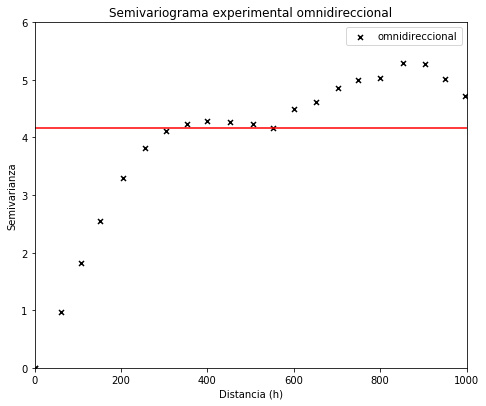

In [75]:
plt.subplot(111)
plt.scatter(lagiso, varioiso, s=25, marker="x", color="black", label="omnidireccional")
plt.plot([0,1000], [4.17,4.17], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental omnidireccional")
plt.ylim(0,6)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [77]:
vario_kri = GSLIB.make_variogram(0, 1, 1, 4.17, 0, 400, 400)

 make_variogram Warning: sill does not sum to 1.0, do not use in simulation 


**Unidad II: Estimación y Categorización**

* Utilizaremos kriging ordinario para estimar.
* Luego categorizaremos la estimación con tres niveles de confianza.

In [81]:
tmin=0;tmax=100;xmn=0;ymn=0;ysiz=10;xsiz=10;nx=100;ny=100
nxdis=1;nydis=1;ndmin=3;ndmax=12;radius=200;ktype=1;skmean=1

In [82]:
kmap, vmap = geostats.kb2d(df, "X", "Y", "VA", tmin, tmax, nx, xmn, xsiz, ny, ymn, ysiz, nxdis, nydis, ndmin, ndmax, radius, ktype, skmean, vario_kri)

  Estimated   10000 blocks 
      average   8.050593326975756  variance  3.7617425734272985


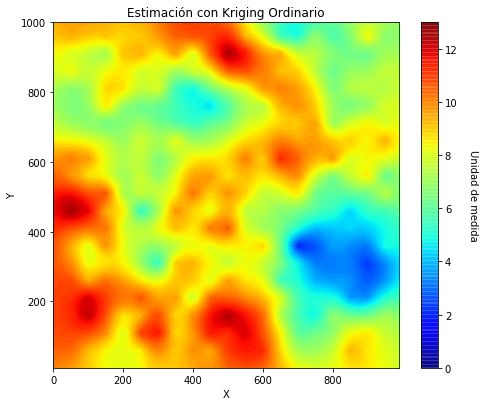

In [88]:
plt.subplot(111)
GSLIB.pixelplt_st(kmap, xmin, xmax,ymin,ymax,xsiz,0,13,"Estimación con Kriging Ordinario", "X", "Y", "Unidad de medida", cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [93]:
vmap[vmap < 0] = 0

In [96]:
cv_map = 2*(np.sqrt(vmap))/kmap
cv_map.max()

0.5107999966908208

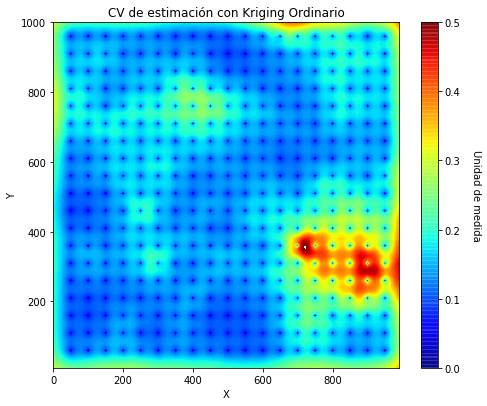

In [98]:
plt.subplot(111)
GSLIB.pixelplt_st(cv_map, xmin, xmax,ymin,ymax,xsiz,0,0.5,"CV de estimación con Kriging Ordinario", "X", "Y", "Unidad de medida", cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [103]:
cat_ko = np.where(cv_map > 0.25, "3",
                  (np.where(cv_map < 0.15, "1", "2")))

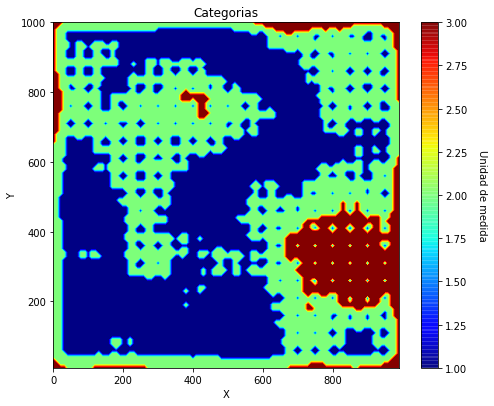

In [105]:
plt.subplot(111)
GSLIB.pixelplt_st(cat_ko, xmin, xmax,ymin,ymax,xsiz,1,3,"Categorias", "X", "Y", "Unidad de medida", cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()